In [ ]:
import os
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
#!pip install -q kaggle
!mkdir p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets download -d arbindon/medicinaldatasets
#!kaggle datasets download -d arbindon/aaditya-datasets
!kaggle datasets download -d aaditya9854/leaves-manual-augmented-7classes


100% 6.61G/6.61G [03:05<00:00, 39.2MB/s]
100% 6.61G/6.61G [03:05<00:00, 38.2MB/s]


In [ ]:
!unzip -q leaves-manual-augmented-7classes.zip

In [ ]:
# Set your dataset directory
dataset_dir = "/content/Leaves_manual_augmented"

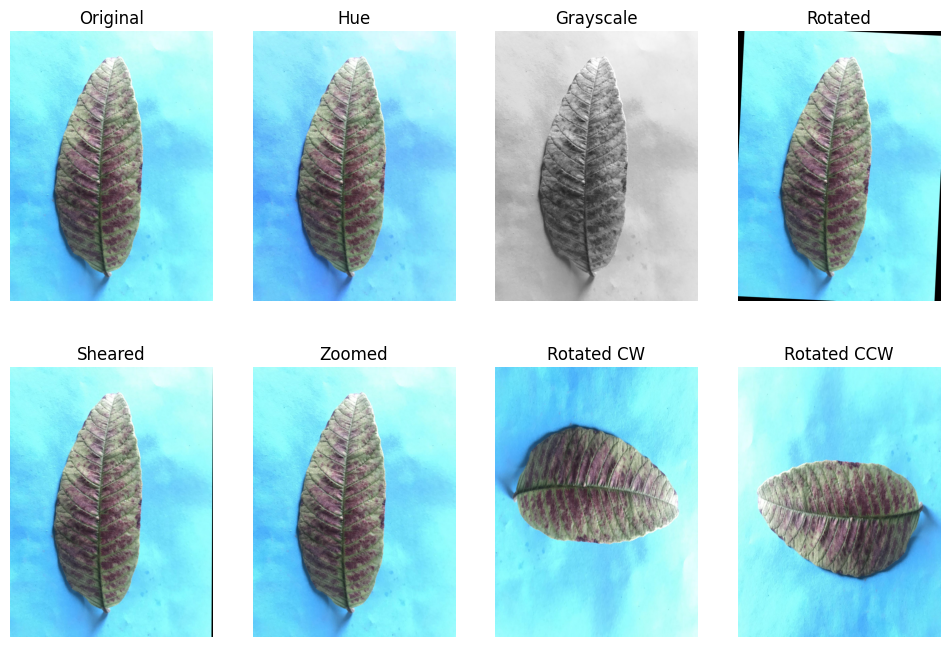

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def apply_augmentations(image):
    # Hue adjustment
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h_shift = np.random.randint(0, 50) - 25
    hsv_image[:,:,0] = (hsv_image[:,:,0] + h_shift) % 180
    image_hue = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

    # Grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_gray = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)

    # Rotation
    angle = np.random.uniform(-10, 10)
    rotation_matrix = cv2.getRotationMatrix2D((image.shape[1]//2, image.shape[0]//2), angle, 1)
    image_rotated = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

    # Shear
    shear_factor = np.random.uniform(-0.1, 0.1)
    shear_matrix = np.array([[1, shear_factor, 0], [0, 1, 0]])
    image_sheared = cv2.warpAffine(image, shear_matrix, (image.shape[1], image.shape[0]))

    # Zoom
    zoom_factor = np.random.uniform(0.9, 1.1)
    image_zoomed = cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor)

    # Rotate 90 degrees clockwise
    image_rotated_cw = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    image_rotated_cw = cv2.resize(image_rotated_cw, (image.shape[1], image.shape[0]))

    # Rotate 90 degrees counterclockwise
    image_rotated_ccw = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    image_rotated_ccw = cv2.resize(image_rotated_ccw, (image.shape[1], image.shape[0]))

    return [image, image_hue, image_gray, image_rotated, image_sheared, image_zoomed, image_rotated_cw, image_rotated_ccw]

# Load your image from the dataset
image_path = "/content/New folder/train/Guava/original_viber_image_2024-03-01_16-46-19-558.jpg"
original_image = cv2.imread(image_path)

# Apply augmentations
augmented_images = apply_augmentations(original_image)

# Display original and augmented images
titles = ["Original", "Hue", "Grayscale", "Rotated", "Sheared", "Zoomed", "Rotated CW", "Rotated CCW"]
plt.figure(figsize=(12, 8))

for i in range(len(augmented_images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(cv2.cvtColor(augmented_images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.show()



In [ ]:
num_classes = 7

In [ ]:
train_dir = '/content/Leaves_manual_augmented/Train'
val_dir= '/content/Leaves_manual_augmented/Validation'
test_dir= '/content/Leaves_manual_augmented/Test'

In [ ]:
import tensorflow as tf
# loading dataset
image_height = 224
image_width = 224
image_size = (image_height, image_width)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels = 'inferred',
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,

    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    shuffle = False,
    image_size=image_size,
    batch_size=batch_size,
)

Found 5424 files belonging to 7 classes.
Found 949 files belonging to 7 classes.
Found 618 files belonging to 7 classes.


In [ ]:
import cv2
import imghdr
data_dir = '/content/Leaves_manual_augmented'
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)

IsADirectoryError: [Errno 21] Is a directory: '/content/Leaves_manual_augmented/Validation/Bamboo'

In [ ]:
import cv2
import imghdr
data_dir = '/content/output/validation'
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)

Image not in ext list /content/output/validation/Betel/green-betel-leaf-isolated-on-600nw-517123249.jpg
Image not in ext list /content/output/validation/Aloevera/potential-health-benefits-of-aloe-vera-1440x810.jpg
Image not in ext list /content/output/validation/Mint/Peppermint.jpg
Image not in ext list /content/output/validation/Mint/depositphotos_11489894-stock-photo-fresh-mint-leave.jpg
Image not in ext list /content/output/validation/Papaya/papaya-leaves-background-banner-celebration-600w-1202505676.jpg
Image not in ext list /content/output/validation/Papaya/papaya-leaf-isolated-260nw-83453950.jpg
Image not in ext list /content/output/validation/Neem/medicinal-neem-leaves-fruit-over-260nw-725680810.jpg
Image not in ext list /content/output/validation/Tulsi/220px-TULSI_LEAF_ultra_close_view.jpg


In [ ]:
import cv2
import imghdr
data_dir = '/content/output/test'
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)

Image not in ext list /content/output/test/Aloevera/16-9_Hero.jpg
Image not in ext list /content/output/test/Papaya/papaya-leaf-green-isolated-on-260nw-1689526027.jpg
Image not in ext list /content/output/test/Rose/roseslugjpg-5aa4db98691add15.jpg
Image not in ext list /content/output/test/Guava/leaves-guava-white-background-260nw-502829056.jpg
Image not in ext list /content/output/test/Tulsi/rama-tulsi-leaves-ocimum-tenuiflorum-260nw-1745524190.jpg


In [ ]:
import tensorflow as tf
# loading dataset
image_height = 224
image_width = 224
image_size = (image_height, image_width)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels = 'inferred',
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,

    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    shuffle = False,
    image_size=image_size,
    batch_size=batch_size,
)

Found 5424 files belonging to 7 classes.
Found 949 files belonging to 7 classes.
Found 618 files belonging to 7 classes.


In [ ]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)


['Aloevera', 'Bamboo', 'Guava', 'Mint', 'Papaya', 'Pomegranate', 'Rose']


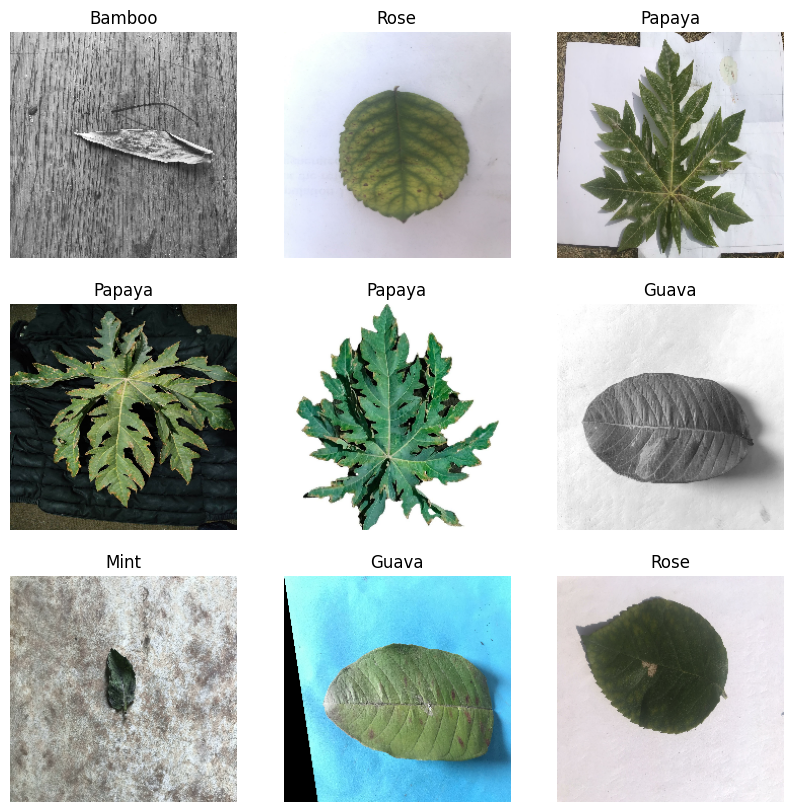

In [ ]:
# Displaying the pictures
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Check the shape of the input data
print(train_ds.shape)
print(val_ds.shape)

# Check the data type of the input data
print(train_ds.dtype)
print(val_ds.dtype)

# Check if the JPEG data is valid
!jpegtran -v train_ds/*.jpg
!jpegtran -v val_ds/*.jpg

AttributeError: '_PrefetchDataset' object has no attribute 'shape'

In [ ]:
# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Standardize or normalizing the data
normalization_layer = layers.Rescaling(1./255)

In [ ]:
import numpy as np
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} jpeg::Uncompress failed. Invalid JPEG data or crop window.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

In [ ]:
# Build the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
num_classes = len(class_names)
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
# Compile the model with sparse categorical crossentropy
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# fitting the model with 10 epochs
epochs=15
primary_model = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/15


KeyboardInterrupt: 

In [ ]:
# fitting the model with 10 epochs
epochs=15
primary_model = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/15
170/170 [==============================] - 141s 832ms/step - loss: 0.9475 - accuracy: 0.6606 - val_loss: 0.6178 - val_accuracy: 0.8293
Epoch 2/15
170/170 [==============================] - 74s 435ms/step - loss: 0.1625 - accuracy: 0.9517 - val_loss: 0.1036 - val_accuracy: 0.9715
Epoch 3/15
170/170 [==============================] - 74s 433ms/step - loss: 0.1177 - accuracy: 0.9690 - val_loss: 0.0471 - val_accuracy: 0.9821
Epoch 4/15
170/170 [==============================] - 73s 432ms/step - loss: 0.0338 - accuracy: 0.9912 - val_loss: 0.0328 - val_accuracy: 0.9926
Epoch 5/15
170/170 [==============================] - 73s 432ms/step - loss: 0.0534 - accuracy: 0.9843 - val_loss: 0.0417 - val_accuracy: 0.9884
Epoch 6/15
170/170 [==============================] - 73s 430ms/step - loss: 0.0427 - accuracy: 0.9865 - val_loss: 0.0173 - val_accuracy: 0.9947
Epoch 7/15
170/170 [==============================] - 73s 429ms/step - loss: 0.0948 - accuracy: 0.9768 - val_loss: 0.0195 - val_a

Text(0.5, 1.0, 'Training and Validation Loss')

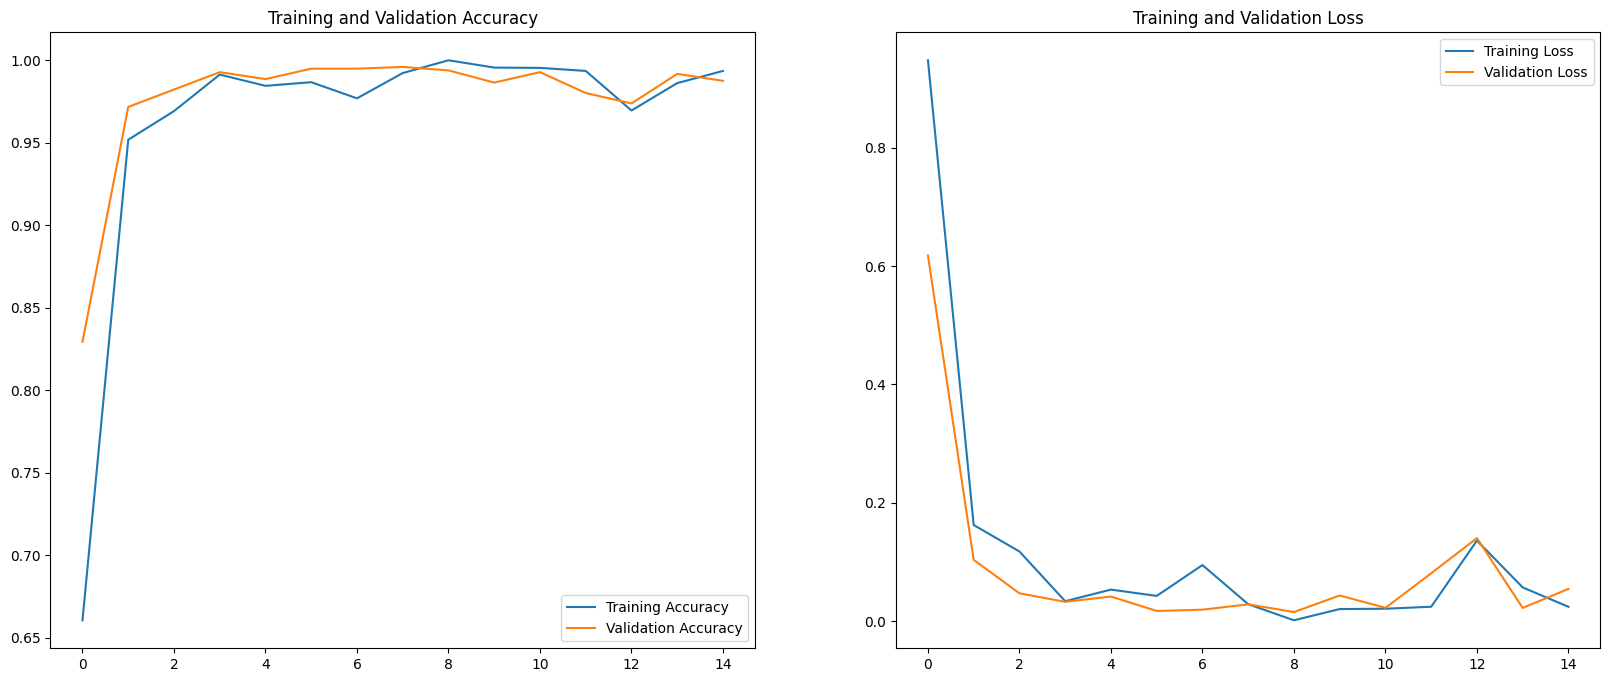

In [ ]:

acc = primary_model.history['accuracy']
val_acc = primary_model.history['val_accuracy']

loss = primary_model.history['loss']
val_loss = primary_model.history['val_loss']

epochs_range = range(epochs)

# Ploting traingin and validation accuracy
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Ploting traingin and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')


20/20 [==============================] - 35s 2s/step - loss: 0.0535 - accuracy: 0.9790
Test Accuracy: 0.9789643883705139
Test Loss: 0.053529128432273865


8/8 [==============================] - 2s 277ms/step


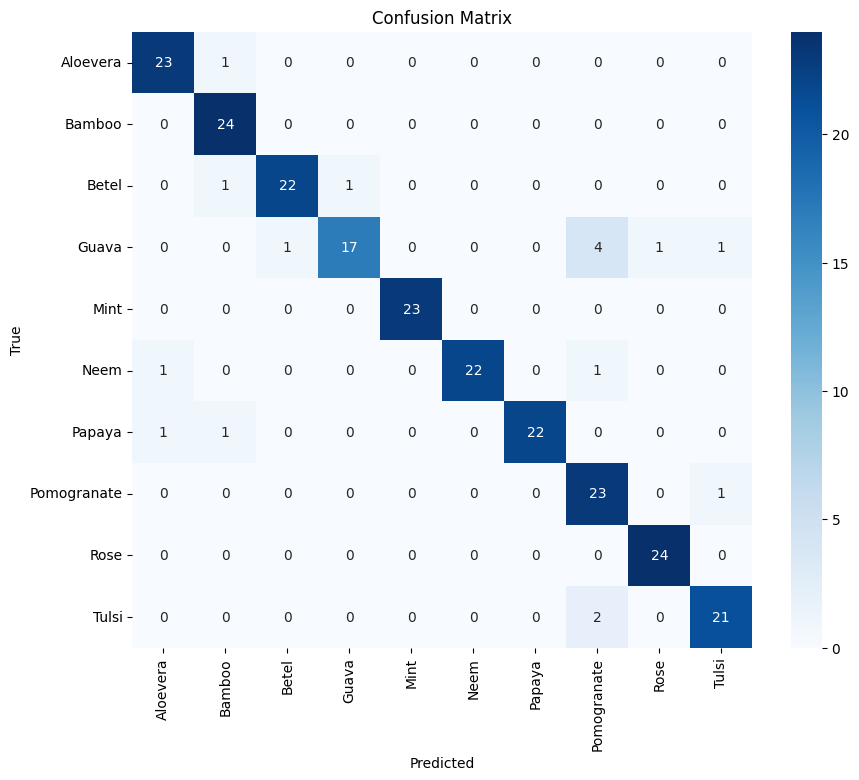

              precision    recall  f1-score   support

    Aloevera       0.92      0.96      0.94        24
      Bamboo       0.89      1.00      0.94        24
       Betel       0.96      0.92      0.94        24
       Guava       0.94      0.71      0.81        24
        Mint       1.00      1.00      1.00        23
        Neem       1.00      0.92      0.96        24
      Papaya       1.00      0.92      0.96        24
 Pomogranate       0.77      0.96      0.85        24
        Rose       0.96      1.00      0.98        24
       Tulsi       0.91      0.91      0.91        23

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
import seaborn as sns
# ploting the confusion matrix
predictions = model.predict(test_ds)
y_true = []


for _, labels in test_ds:
    y_true.extend(labels.numpy())
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Generating the classification report
report = classification_report(y_true, y_pred, target_names=class_names)

# Printing the classification report
print(report)

20/20 [==============================] - 33s 2s/step


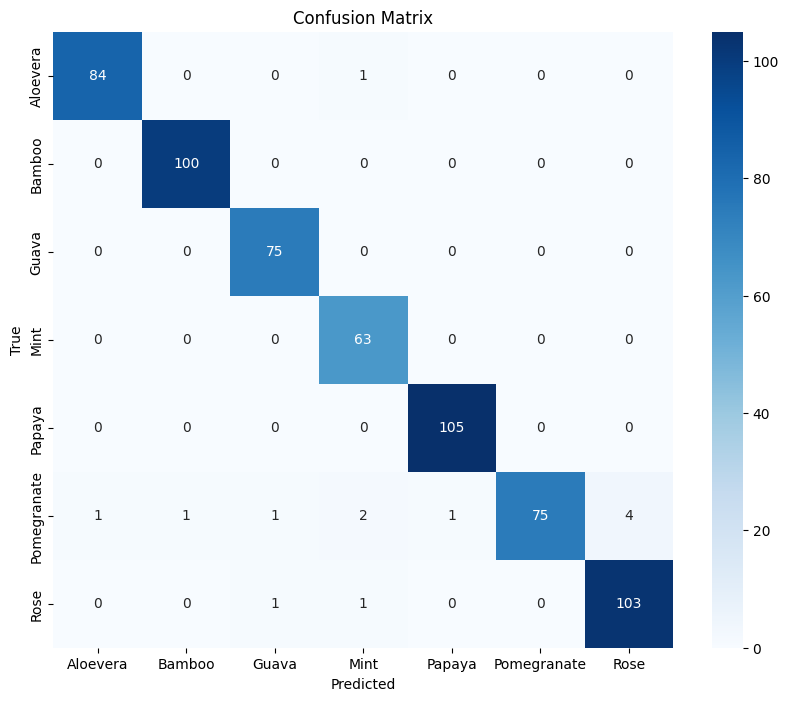

              precision    recall  f1-score   support

    Aloevera       0.99      0.99      0.99        85
      Bamboo       0.99      1.00      1.00       100
       Guava       0.97      1.00      0.99        75
        Mint       0.94      1.00      0.97        63
      Papaya       0.99      1.00      1.00       105
 Pomegranate       1.00      0.88      0.94        85
        Rose       0.96      0.98      0.97       105

    accuracy                           0.98       618
   macro avg       0.98      0.98      0.98       618
weighted avg       0.98      0.98      0.98       618



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
import seaborn as sns
import numpy as np

# ploting the confusion matrix
predictions = model.predict(test_ds)
y_true = []


for _, labels in test_ds:
    y_true.extend(labels.numpy())
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Generating the classification report
report = classification_report(y_true, y_pred, target_names=class_names)

# Printing the classification report
print(report)

In [ ]:
from keras.models import load_model
import pickle


# Save the trained model
model.save('Vgg_manual_7classes.h5')

# Save the training history using pickle
with open('training_history.pkl', 'wb') as file:
    pickle.dump(primary_model.history, file)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle
pickle.dump(model, open('Vgg_manual_7classes.pkl', 'wb'))

In [ ]:
model.save('Vgg_manual_7classes.keras')

1/1 [==============================] - 0s 21ms/step
Predicted Class: Guava
Confidence Score: 0.6889573


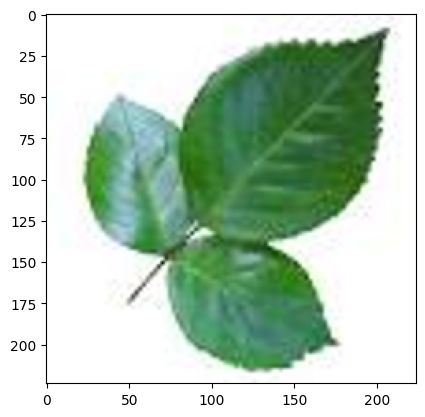

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' and 'class_names' are defined somewhere in your code

list_ = class_names

# Input image
test_image = Image.open('/content/Leaves_manual_augmented/Rose test/images211.jpg')
test_image = test_image.resize((224, 224))

plt.imshow(test_image)
test_image = np.array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = model.predict(test_image)

# Get the index of the predicted class
result_index = np.argmax(result)

# Get the confidence score of the predicted class
confidence_score = result[0][result_index]


if confidence_score >= 0.5:
   print('Predicted Class:', list_[result_index])
   print('Confidence Score:', confidence_score)
else:
   print('No plant detected')


1/1 [==============================] - 1s 902ms/step
Top 1 - Class: Pomogranate, Confidence Score: 0.7947801351547241
Top 2 - Class: Bamboo, Confidence Score: 0.14828190207481384


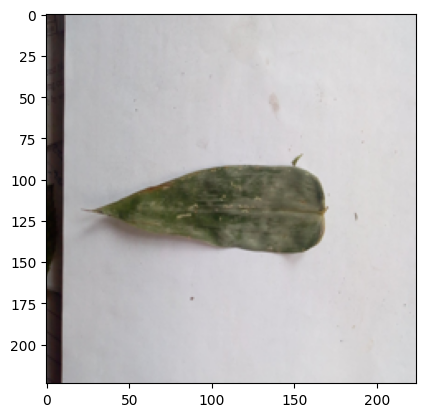

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' and 'class_names' are defined somewhere in your code

list_ = ['Aloevera', 'Bamboo', 'Guava', 'Mint', 'Papaya', 'Pomogranate', 'Rose']

# Input image
test_image = Image.open('/content/aadibambo1.jpg')
test_image = test_image.resize((224, 224))

plt.imshow(test_image)
test_image = np.array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = loaded_model.predict(test_image)

# Get the top N predicted classes and their confidence scores
top_classes = 2  # You can change this to get more or fewer top classes
top_indices = np.argsort(result[0])[::-1][:top_classes]
top_confidence_scores = result[0][top_indices]

# Display the top N predicted classes and their confidence scores
for i in range(top_classes):
    print(f'Top {i + 1} - Class: {list_[top_indices[i]]}, Confidence Score: {top_confidence_scores[i]}')


In [ ]:
model.save('final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def create_vgg_model(input_shape=(224, 224, 3), num_classes=10):
    model = Sequential()

    # Convolutional Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Convolutional Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Convolutional Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Convolutional Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Convolutional Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Create the VGG-like model
vgg_model = create_vgg_model()

# Display the model summary
vgg_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

# Load and Augment Data
train_generator = train_datagen.flow_from_directory(
    '/content/output/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'  # or 'sparse' if using sparse_categorical_crossentropy
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/output/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'  # or 'sparse' if using sparse_categorical_crossentropy
)

Found 3683 images belonging to 10 classes.
Found 695 images belonging to 10 classes.


In [ ]:
# Compile the model with sparse categorical crossentropy
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set Up Callbacks (Optional)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
callbacks = [checkpoint]

# Train the Model
history = vgg_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/15
 77/116 [==================>...........] - ETA: 31s - loss: 2.3037 - accuracy: 0.1031

KeyboardInterrupt: 

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# Ploting traingin and validation accuracy
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Ploting traingin and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
import seaborn as sns
# ploting the confusion matrix
predictions = vgg_model.predict(test_ds)
y_true = []
for _, labels in test_ds:
    y_true.extend(labels.numpy())
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Generating the classification report
report = classification_report(y_true, y_pred, target_names=class_names)

# Printing the classification report
print(report)

In [ ]:
from tensorflow.keras.models import load_model

# Assuming your model was saved as 'final_model.h5'
loaded_model = load_model('/content/output (2)/output/final_model.h5')

# Now `loaded_model` is a Keras model that you can use for predictions, evaluation, etc.


1/1 [==============================] - 1s 1s/step
Predicted Class: Aloevera
Confidence Score: 0.46489072


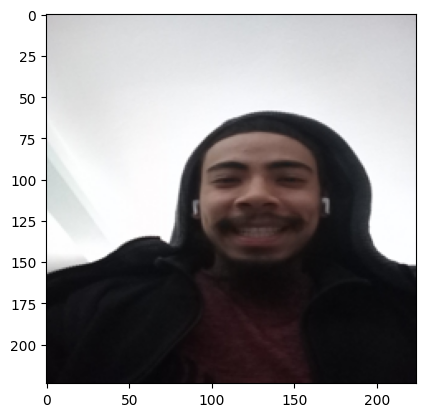

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' and 'class_names' are defined somewhere in your code

list_ = ['Aloevera', 'Bamboo', 'Betel', 'Guava', 'Mint', 'Neem', 'Papaya', 'Pomogranate', 'Rose', 'Tulsi']

# Input image
test_image = Image.open('/content/aadityaphoto.jpg')
test_image = test_image.resize((224, 224))

plt.imshow(test_image)
test_image = np.array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = loaded_model.predict(test_image)

# Get the index of the predicted class
result_index = np.argmax(result)

# Get the confidence score of the predicted class
confidence_score = result[0][result_index]

if confidence_score >= 0.6:
   print('Predicted Class:', list_[result_index])
   print('Confidence Score:', confidence_score)
else:
   print('Unable to predict')
